# BUSSINESS UNDERSTANDING

dataset: https://www.kaggle.com/datasets/knightbearr/pizza-price-prediction

Model ini dibuat untuk memprediksi harga pizza di indonesia berdasarkan ukuran pizza.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('pizza_v1.csv')

# DATA UNDERSTANDING

In [8]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [9]:
# Membersihkan Data Harga
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '').str.replace(',', '')

# Convert Data Price ke Numeric
df['price_rupiah'] = pd.to_numeric(df['price_rupiah'])

# Convert ke float number
df['price_rupiah'] = df['price_rupiah'].astype('float64')

df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000.0,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    float64
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(2), object(6)
memory usage: 8.2+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_rupiah,129.0,87151.162791,44706.097732,23500.0,51000.0,78000.0,105000.0,248000.0
diameter,129.0,12.976744,3.272674,8.0,12.0,12.0,14.0,22.0


<Axes: >

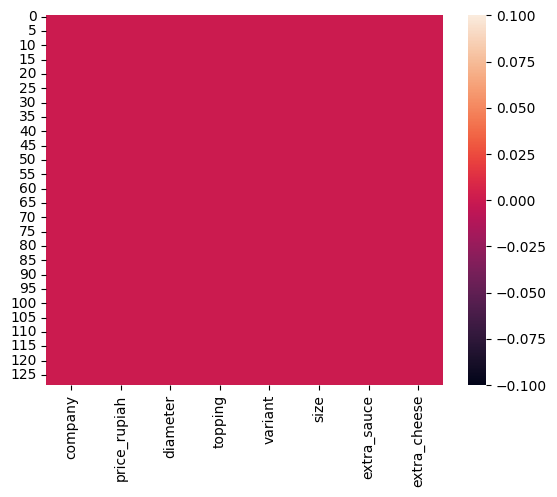

In [12]:
#cek missing data
sns.heatmap(df.isnull())

# DATA PREPARATION

Jumlah Company Pizza

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'D'),
  Text(1, 0, 'B'),
  Text(2, 0, 'A'),
  Text(3, 0, 'C'),
  Text(4, 0, 'E')])

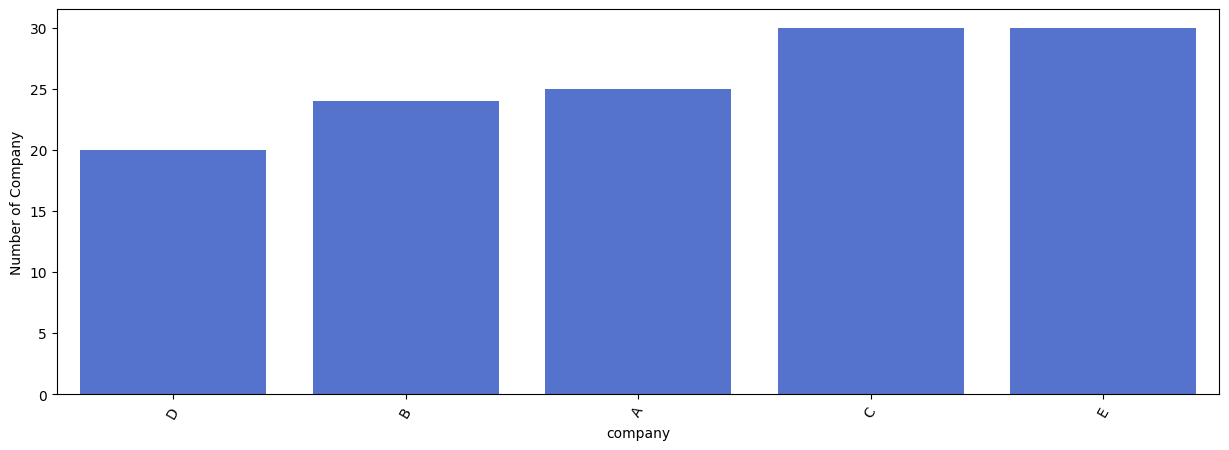

In [13]:
Company = df.groupby('company').count()[['size']].sort_values(by='size',ascending=True).reset_index()
Company = Company.rename(columns={'size':'Number of Company'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=Company['company'], y=Company['Number of Company'], color='royalblue')
plt.xticks(rotation=60)

Diameter Pizza


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '8.0'),
  Text(1, 0, '8.5'),
  Text(2, 0, '12.0'),
  Text(3, 0, '14.0'),
  Text(4, 0, '16.0'),
  Text(5, 0, '16.5'),
  Text(6, 0, '17.0'),
  Text(7, 0, '18.0'),
  Text(8, 0, '18.5'),
  Text(9, 0, '20.0'),
  Text(10, 0, '22.0')])

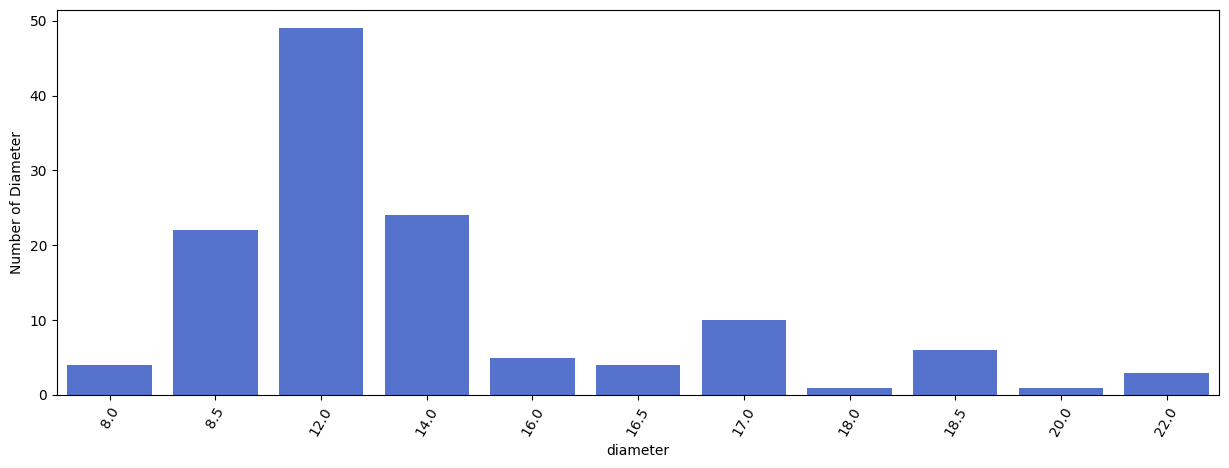

In [14]:
Diameter = df.groupby('diameter').count()[['size']].sort_values(by='size',ascending=True).reset_index()
Diameter = Diameter.rename(columns={'size':'Number of Diameter'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=Diameter['diameter'], y=Diameter['Number of Diameter'], color='royalblue')
plt.xticks(rotation=60)

Topping Pizza

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'onion'),
  Text(1, 0, 'papperoni'),
  Text(2, 0, 'beef'),
  Text(3, 0, 'black papper'),
  Text(4, 0, 'sausage'),
  Text(5, 0, 'meat'),
  Text(6, 0, 'tuna'),
  Text(7, 0, 'vegetables'),
  Text(8, 0, 'smoked beef'),
  Text(9, 0, 'mozzarella'),
  Text(10, 0, 'mushrooms'),
  Text(11, 0, 'chicken')])

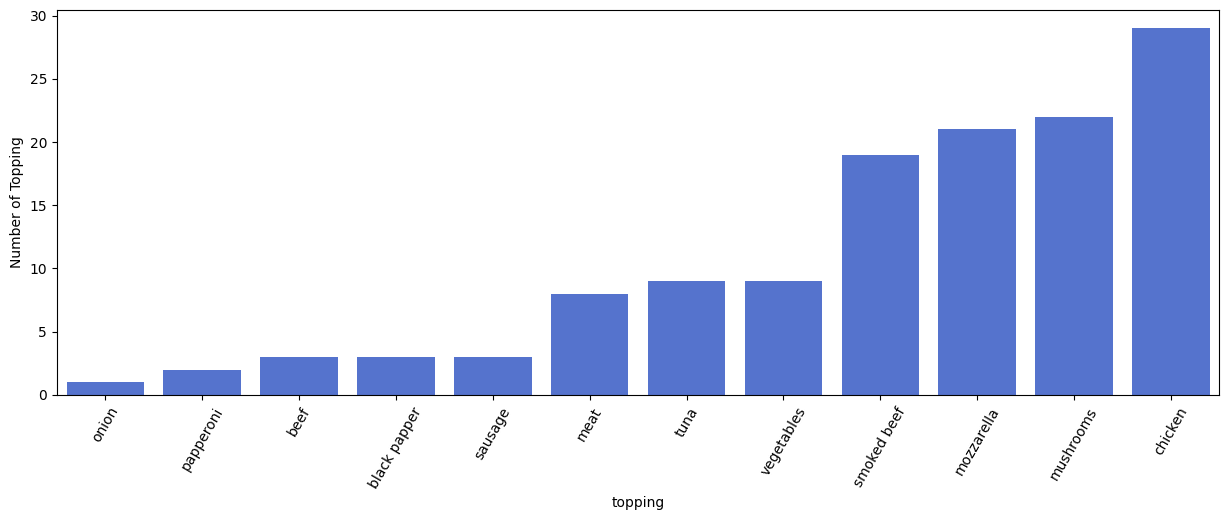

In [15]:
Diameter = df.groupby('topping').count()[['size']].sort_values(by='size',ascending=True).reset_index()
Diameter = Diameter.rename(columns={'size':'Number of Topping'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=Diameter['topping'], y=Diameter['Number of Topping'], color='royalblue')
plt.xticks(rotation=60)

Variant Pizza

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'extravaganza'),
  Text(1, 0, 'spicy_tuna'),
  Text(2, 0, 'spicy tuna'),
  Text(3, 0, 'neptune_tuna'),
  Text(4, 0, 'meat_eater'),
  Text(5, 0, 'italian_veggie'),
  Text(6, 0, 'gournet_greek'),
  Text(7, 0, 'thai_veggie'),
  Text(8, 0, 'american_classic'),
  Text(9, 0, 'BBQ_sausage'),
  Text(10, 0, 'double_signature'),
  Text(11, 0, 'super_supreme'),
  Text(12, 0, 'american_favorite'),
  Text(13, 0, 'BBQ_meat_fiesta'),
  Text(14, 0, 'double_decker'),
  Text(15, 0, 'crunchy'),
  Text(16, 0, 'meat_lovers'),
  Text(17, 0, 'new_york'),
  Text(18, 0, 'double_mix'),
  Text(19, 0, 'classic')])

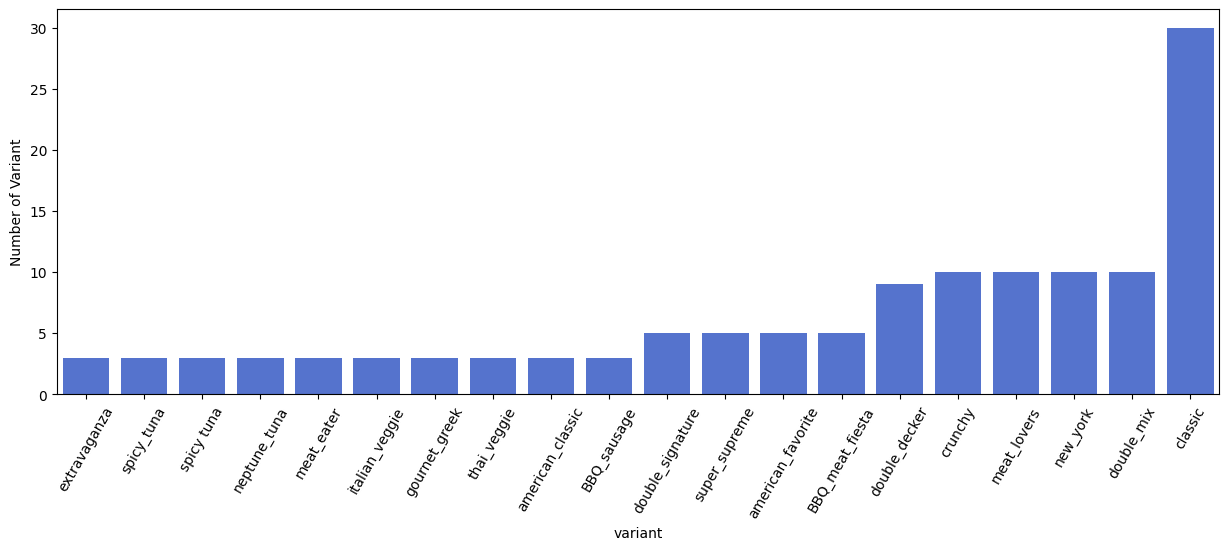

In [16]:
Variant = df.groupby('variant').count()[['size']].sort_values(by='size',ascending=True).reset_index()
Variant = Variant.rename(columns={'size':'Number of Variant'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=Variant['variant'], y=Variant['Number of Variant'], color='royalblue')
plt.xticks(rotation=60)

Size (Ukuran) Pizza

In [17]:
pd.unique(df["size"])

array(['jumbo', 'reguler', 'small', 'medium', 'large', 'XL'], dtype=object)

In [18]:
df.replace(('small', 'reguler', 'medium', 'large', 'XL', 'jumbo'), (1,2,3,4,5,6), inplace=True)

In [19]:
df.replace(('yes', 'no'), (1,0), inplace=True)
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000.0,22.0,chicken,double_signature,6,1,1
1,A,198000.0,20.0,papperoni,double_signature,6,1,1
2,A,120000.0,16.0,mushrooms,double_signature,2,1,1
3,A,155000.0,14.0,smoked beef,double_signature,2,1,0
4,A,248000.0,18.0,mozzarella,double_signature,6,1,0


Double cek correlation data

<Axes: >

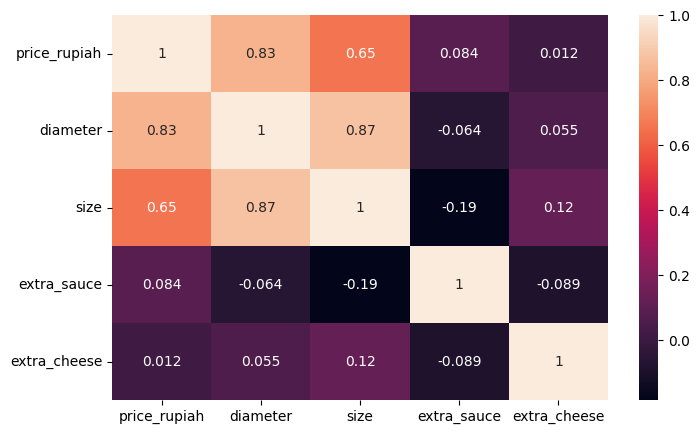

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

Menghapus kolom yang tidak di pakai

In [21]:
df = df.drop(['topping','variant','extra_sauce','extra_cheese'], axis=1)

# MODELLING

In [22]:
#seleksi fitur
features = ['size', 'diameter']
x = df[features]
y = df['price_rupiah']
x.shape, y.shape

((129, 2), (129,))

In [23]:
#SPLIT DATA TRAINING DAN DATA TESTING
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=90)
y_test.shape

(33,)

In [24]:
#MEMBUAT MODEL REGRESI LINIER
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [25]:
#TESTING AKURASI MODEL
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7635163165285637


# EVALUATION

In [26]:
# size         = 6
# diameter     = 22
# price_rupiah = 235000.0
# 	
input_data = np.array([[6, 22]])

prediction = lr.predict(input_data)
print('Estimasi Harga Pizza Berdasarkan Ukuran :', prediction)

Estimasi Harga Pizza Berdasarkan Ukuran : [197467.60624386]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# SAVE MODEL

In [27]:
import pickle

filename = 'estimasi_pizza.sav'
pickle.dump(lr,open(filename,'wb'))